In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
# cotas = pd.read_excel(os.path.join(os.path.dirname(__file__), "Tabela_de_cotas.xlsx"), header=None).to_numpy()
cotas = pd.read_excel("Tabela_de_cotas.xlsx", header=None).to_numpy()

cotas = cotas[:len(cotas)-1, :]
cotas = np.delete(cotas, 1, 1)

In [10]:
def interpolaColunas(cotas):

    wl = []

    novaLinha = [cotas[0, 0], cotas[0, 1]]
    for j in range(2, len(cotas[0])):
        intermed = cotas[0, j]-(cotas[0, j]-cotas[0, j-1])/2
        novaLinha.append(intermed)
        novaLinha.append(cotas[0, j])

    wl.append(novaLinha)

    for i in range(1, len(cotas)):

        bal = []
        beginCounter = len(cotas[0])
        for j in range(2, len(cotas[0])):
            h = cotas[0, j]-cotas[0, j-1]
            if cotas[i, j]-cotas[i, j-1] != 0:
                bal.append(h)
                beginCounter -= 1

        A = np.zeros((len(bal)-1, len(bal)+1))
        b = np.zeros((len(bal)-1))
        for m in range(len(bal)-1):
            A[m, m] = bal[m]
            A[m, m+1] = 2*(bal[m]+bal[m+1])
            A[m, m+2] = bal[m+1]

            b[m] = (cotas[i, m+beginCounter+1]-cotas[i, m+beginCounter]) / \
                bal[m+1]-(cotas[i, m+beginCounter] - cotas[i, m+beginCounter-1])/bal[m]

        A = A[:, 1:len(A[0])-1]
        b = 6*b

        matrixX = np.linalg.solve(A, b)
        matrixX = np.append(matrixX, 0.0)
        matrixX = np.insert(matrixX, 0, 0.0, axis=0)

        novaLinha = [cotas[i, 0], cotas[i, 1]]
        zeroCounter = 2
        for k in range(2, len(cotas[0])):

            if cotas[i, k]-cotas[i, k-1] == 0:
                novaLinha.append(0.0)
                novaLinha.append(cotas[i, k])
                zeroCounter += 1
            else:
                a = (matrixX[k-zeroCounter+1] - matrixX[k-zeroCounter])/(6*bal[k-zeroCounter])
                b = matrixX[k-zeroCounter+1]/2
                c = (cotas[i, k]-cotas[i, k-1])/bal[k-zeroCounter]+(2*bal[k-zeroCounter] * matrixX[k-zeroCounter+1]+matrixX[k-zeroCounter]*bal[k-zeroCounter])/6
                d = cotas[i, k]

                intermed = cotas[0, k]-(cotas[0, k]-cotas[0, k-1])/2
                s = a*(intermed-cotas[0, k])**3+b*(intermed - cotas[0, k])**2+c*(intermed-cotas[0, k])+d

                novaLinha.append(s)
                novaLinha.append(cotas[i, k])

        wl.append(novaLinha)

    cotas = np.asarray(wl)
    return cotas

In [11]:
def interpolaLinhas(cotas):

    wl = []

    newColumn = [cotas[0, 0], cotas[1, 0]]
    for i in range(2, len(cotas)):
        intermed = cotas[i, 0]-(cotas[i, 0]-cotas[i-1, 0])/2
        newColumn.append(intermed)
        newColumn.append(cotas[i, 0])

    wl.append(newColumn)

    for j in range(1, len(cotas[0])):

        bal = []
        beginCounter = len(cotas)
        for i in range(2, len(cotas)):
            h = cotas[i, 0]-cotas[i-1, 0]


            if cotas[i, j]-cotas[i-1, j] != 0:
                bal.append(h)
                beginCounter -= 1

            elif cotas[i, j]-cotas[i-1, j] == 0 and i > len(cotas)/2:
                beginCounter -= 1

        A = np.zeros((len(bal)-1, len(bal)+1))
        b = np.zeros((len(bal)-1))
        for m in range(len(bal)-1):
            A[m, m] = bal[m]
            A[m, m+1] = 2*(bal[m]+bal[m+1])
            A[m, m+2] = bal[m+1]

            b[m] = (cotas[m+beginCounter+1, j] - cotas[m+beginCounter, j]) / \
                bal[m+1]-(cotas[m+beginCounter, j] - cotas[m+beginCounter-1, j])/bal[m]
        A = A[:, 1:len(A[0])-1]
        b = 6*b

        matrixX = np.linalg.solve(A, b)
        matrixX = np.append(matrixX, 0.0)
        matrixX = np.insert(matrixX, 0, 0.0, axis=0)

        newColumn = [cotas[0, j], cotas[1, j]]
        zeroCounter = 2
        for k in range(2, len(cotas)):

            if cotas[k, j]-cotas[k-1, j] == 0:
                newColumn.append(0.0)
                newColumn.append(cotas[k, j])
                zeroCounter += 1
            else:
                a = (matrixX[k-zeroCounter+1] - matrixX[k-zeroCounter])/(6*bal[k-zeroCounter])
                b = matrixX[k-zeroCounter+1]/2
                c = (cotas[k, j]-cotas[k-1, j])/bal[k-zeroCounter]+(2*bal[k-zeroCounter]
                                                                    * matrixX[k-zeroCounter+1]+matrixX[k-zeroCounter]*bal[k-zeroCounter])/6
                d = cotas[k, j]

                intermed = cotas[k, 0]-(cotas[k, 0]-cotas[k-1, 0])/2
                s = a*(intermed-cotas[k, 0])**3+b*(intermed - cotas[k, 0])**2+c*(intermed-cotas[k, 0])+d
                newColumn.append(s)
                newColumn.append(cotas[k, j])

        wl.append(newColumn)

    cotas = np.asarray(wl).transpose()
    return cotas

In [12]:
def nInterpolaAmbos(cotas, n):
    for i in range(1, n+1):
        cotas = interpolaLinhas(interpolaColunas(cotas))

    return cotas


def ninterpolaLinhas(cotas, n):
    for i in range(1, n+1):
        cotas = interpolaLinhas(cotas)

    return cotas


def ninterpolaColunas(cotas, n):
    for i in range(1, n+1):
        cotas = interpolaColunas(cotas)

    return cotas

In [13]:
# Escolha do calado e sua posição na tabela 

def caladoEscolhido(cotas, calado):

    caladoIndex = 0
    for j in range(len(cotas[0])):
        if cotas[0, j] == calado:
            caladoIndex = j
        elif cotas[0, j] < calado and cotas[0, j+1] > calado:
            caladoIndex = j

    caladoTab = cotas[0, caladoIndex]
    print("\nCalado Considerado:", caladoTab, "m")
    return caladoIndex, caladoTab

In [14]:
# Cálculo das propriedades hidrostaticas

def hidroProp(cotas, caladoIndex, caladoTab):

    vetorA = []
    escalarA = []
    C = []
    ########################## PAINÉIS LATERIAS ################################
    for i in range(1, len(cotas)-1):
        for j in range(2, caladoIndex+1):

            v1 = np.array([0, cotas[i, j]-cotas[i, j-1],
                          cotas[0, j]-cotas[0, j-1]])  # p2-p1
            v2 = np.array([cotas[i+1, 0]-cotas[i, 0],
                          cotas[i+1, j-1]-cotas[i+1, j], 0])  # p4-p1
            v3 = np.array([0, cotas[i+1, j-1]-cotas[i+1, j],
                          cotas[0, j-1]-cotas[0, j]])  # p4-p3
            v4 = np.array([cotas[i, 0]-cotas[i+1, 0],
                          cotas[i, j]-cotas[i+1, j], 0])  # p2-p3

            currentA = 0.5*(np.cross(v1, v2)+np.cross(v3, v4))
            currentC = np.array([(2*cotas[i, 0]+2*cotas[i+1, 0])/4, (cotas[i, j]+cotas[i,
                                j-1]+cotas[i+1, j-1]+cotas[i+1, j])/4, (2*cotas[0, j]+2*cotas[0, j-1])/4])

            vetorA.append(currentA.copy())
            escalarA.append(np.linalg.norm(currentA))
            C.append(currentC)

            # Para o outro lado
            v1 = np.array([cotas[i+1, 0]-cotas[i, 0],
                          (-cotas[i+1, j-1])-(-cotas[i, j-1]), 0])  # p2-p1
            v2 = np.array([0, (-cotas[i, j])-(-cotas[i, j-1]),
                          cotas[0, j]-cotas[0, j-1]])  # p4-p1
            v3 = np.array([cotas[i, 0]-cotas[i+1, 0],
                          (-cotas[i, j])-(-cotas[i+1, j]), 0])  # p4-p3
            v4 = np.array([0, (-cotas[i+1, j-1])-(-cotas[i+1, j]),
                          cotas[0, j-1]-cotas[0, j]])  # p2-p3

            currentA = 0.5*(np.cross(v1, v2)+np.cross(v3, v4))
            currentC = np.array([(2*cotas[i, 0]+2*cotas[i+1, 0])/4, (-cotas[i, j]-cotas[i,
                                j-1]-cotas[i+1, j-1]-cotas[i+1, j])/4, (2*cotas[0, j]+2*cotas[0, j-1])/4])

            vetorA.append(currentA.copy())
            escalarA.append(np.linalg.norm(currentA))
            C.append(currentC.copy())

    ########################## PAINÉIS DE POPA ################################
    vetorPopaA = []
    escalarPopaA = []
    popaC = []

    for j in range(1, caladoIndex):
        v1 = np.array([0, 0, cotas[0, j+1]-cotas[0, j]])  # p2-p1
        v2 = np.array([0, cotas[1, j], 0])  # p4-p1
        v3 = np.array([0, cotas[1, j]-cotas[1, j+1],
                      cotas[0, j]-cotas[0, j+1]])  # p4-p3
        v4 = np.array([0, 0-cotas[1, j+1], 0])  # p2-p3

        currentA = 0.5*(np.cross(v1, v2)+np.cross(v3, v4))
        currentC = np.array(
            [0, (cotas[1, j]+cotas[1, j+1])/4, (2*cotas[0, j]+2*cotas[0, j+1])/4])

        vetorPopaA.append(currentA.copy())
        escalarPopaA.append(np.linalg.norm(currentA))
        popaC.append(currentC.copy())

        v1 = np.array([0, -cotas[1, j], 0])  # p2-p1
        v2 = np.array([0, 0, cotas[0, j+1]-cotas[0, j]])  # p4-p1
        v3 = np.array([0, cotas[1, j+1], 0])  # p4-p3
        v4 = np.array([0, -cotas[1, j]-(-cotas[1, j+1]),
                      cotas[0, j]-cotas[0, j+1]])  # p2-p3

        currentA = 0.5*(np.cross(v1, v2)+np.cross(v3, v4))
        currentC = np.array(
            [0, (-cotas[1, j]-cotas[1, j+1])/4, (2*cotas[0, j]+2*cotas[0, j+1])/4])

        vetorPopaA.append(currentA.copy())
        escalarPopaA.append(np.linalg.norm(currentA))
        popaC.append(currentC.copy())

    ########################## PAINÉIS DO TOPO ################################

    vetorTopoA = []
    escalarTopoA = []
    topoC = []
    baliza = []

    matrixYWL = cotas[1:, :caladoIndex+1]
    matrixYWL = np.delete(matrixYWL, np.s_[1:len(matrixYWL[0])-1], axis=1)

    for i in range(len(matrixYWL)):
        currentBal = np.linspace(0, matrixYWL[i, -1], len(cotas[0])*5)
        currentBal = np.insert(currentBal, 0, matrixYWL[i, 0], axis=0)
        baliza.append(currentBal)

    matrixYWL = np.asarray(baliza)

    # Cálculo do vetores e painéis
    for i in range(len(matrixYWL)-1):
        for j in range(2, len(matrixYWL[0])):
            v1 = np.array([matrixYWL[i+1, 0]-matrixYWL[i, 0],
                          matrixYWL[i+1, j-1]-matrixYWL[i, j-1], caladoTab])  # p2-p1
            v2 = np.array(
                [0, matrixYWL[i, j]-matrixYWL[i, j-1], caladoTab])  # p4-p1
            v3 = np.array([matrixYWL[i, 0]-matrixYWL[i+1, 0],
                          matrixYWL[i, j]-matrixYWL[i+1, j], caladoTab])  # p4-p3
            v4 = np.array(
                [0, matrixYWL[i+1, j-1]-matrixYWL[i+1, j], caladoTab])  # p2-p3

            currentA = 0.5*(np.cross(v1, v2)+np.cross(v3, v4))
            currentC = np.array([(2*matrixYWL[i, 0]+2*matrixYWL[i+1, 0])/4, (matrixYWL[i, j] +
                                matrixYWL[i, j-1]+matrixYWL[i+1, j-1]+matrixYWL[i+1, j])/4, caladoTab])

            vetorTopoA.append(currentA.copy())
            escalarTopoA.append(np.linalg.norm(currentA))
            topoC.append(currentC.copy())

            # Para o outro lado
            v1 = np.array([matrixYWL[i+1, 0]-matrixYWL[i, 0], -
                          matrixYWL[i+1, j]-(-matrixYWL[i, j]), caladoTab])  # p2-p1
            v2 = np.array(
                [0, -matrixYWL[i, j-1]-(-matrixYWL[i, j]), caladoTab])  # p4-p1
            v3 = np.array([matrixYWL[i, 0]-matrixYWL[i+1, 0], -
                          matrixYWL[i, j-1]-(-matrixYWL[i+1, j-1]), caladoTab])  # p4-p3
            v4 = np.array(
                [0, -matrixYWL[i+1, j]-(-matrixYWL[i+1, j-1]), caladoTab])  # p2-p3

            currentA = 0.5*(np.cross(v1, v2)+np.cross(v3, v4))
            currentC = np.array([(2*matrixYWL[i, 0]+2*matrixYWL[i+1, 0])/4, (-matrixYWL[i, j] -
                                matrixYWL[i, j-1]-matrixYWL[i+1, j-1]-matrixYWL[i+1, j])/4, caladoTab])

            vetorTopoA.append(currentA.copy())
            escalarTopoA.append(np.linalg.norm(currentA))
            topoC.append(currentC.copy())

    ########################## PAINÉIS DO FUNDO ################################

    vetorFundoA = []
    escalarFundoA = []
    fundoC = []

    for i in range(2, len(cotas)):
        v1 = np.array([cotas[i, 0]-cotas[i-1, 0],
                      cotas[i, 1]-cotas[i-1, 1], 0])
        v2 = np.array([0, -cotas[i-1, 1], 0])
        v3 = np.array([cotas[i-1, 0]-cotas[i, 0], 0, 0])  # p4-p3
        v4 = np.array([0, cotas[i, 1], 0])

        currentA = 0.5*(np.cross(v1, v2)+np.cross(v3, v4))
        currentC = np.array([(2*cotas[i, 0]+2*cotas[i-1, 0])/4,
                            (cotas[i, 1]+cotas[i-1, 1])/4, (2*cotas[0, 1])/4])

        vetorFundoA.append(currentA.copy())
        escalarFundoA.append(np.linalg.norm(currentA))
        fundoC.append(currentC.copy())

        v1 = np.array([cotas[i, 0]-cotas[i-1, 0], 0, 0])  # p2-p1
        v2 = np.array([0, cotas[i-1, 1], 0])  # p4-p1
        v3 = np.array([cotas[i-1, 0]-cotas[i, 0], -
                      cotas[i-1, 1]-(-cotas[i, 1]), 0])  # p4-p3
        v4 = np.array([0, 0-(-cotas[i, 1]), 0])  # p2-p3

        currentA = 0.5*(np.cross(v1, v2)+np.cross(v3, v4))
        currentC = np.array([(2*cotas[i, 0]+2*cotas[i-1, 0])/4,
                            (-cotas[i, 1]-cotas[i-1, 1])/4, (2*cotas[0, 1])/4])

        vetorFundoA.append(currentA.copy())
        escalarFundoA.append(np.linalg.norm(currentA))
        fundoC.append(currentC.copy())

    ################################ ÁREA DA SUPERFÍCIE MOLHADA ################################
    areaw = 0

    areaw += np.sum(escalarA)
    areaw += np.sum(escalarFundoA)
    areaw += np.sum(escalarPopaA)

    print("\nAw:", areaw)
    ################################ ÁREA DO PLANO DE LINHA D'ÁGUA ################################

    wlA = 0
    vetorTopoAarray = np.asarray(vetorTopoA)

    wlA = vetorTopoAarray[:, 2].sum(axis=0)

    print("\nAwl:", wlA, "m\u00b2")

    ################################ VOLUME DESLOCADO ################################
    xTerm, yTerm, zTerm = 0, 0, 0

    for i in range(len(vetorA)):
        xTerm += vetorA[i][0]*C[i][0]
        yTerm += vetorA[i][1]*C[i][1]
        zTerm += vetorA[i][2]*C[i][2]

    for i in range(len(vetorPopaA)):
        xTerm += vetorPopaA[i][0]*popaC[i][0]
        yTerm += vetorPopaA[i][1]*popaC[i][1]
        zTerm += vetorPopaA[i][2]*popaC[i][2]

    for i in range(len(vetorFundoA)):
        xTerm += vetorFundoA[i][0]*fundoC[i][0]
        yTerm += vetorFundoA[i][1]*fundoC[i][1]
        zTerm += vetorFundoA[i][2]*fundoC[i][2]

    for i in range(len(vetorTopoA)):
        xTerm += vetorTopoA[i][0]*topoC[i][0]
        yTerm += vetorTopoA[i][1]*topoC[i][1]
        zTerm += vetorTopoA[i][2]*topoC[i][2]

    nabla = (xTerm+yTerm+zTerm)/3
    print("\n∇:", nabla, "m\u00b3")
    delta = nabla*1.025
    print("\nΔ:", delta, "t")

    ################################ PLANO DE FLUTUAÇÃO ################################

    LCFnumerador, LCFandTCFdenominador, TCFnumerador = 0, 0, 0

    for i in range(len(vetorTopoA)):

        LCFnumerador += (-vetorTopoA[i][2])*topoC[i][0]
        TCFnumerador += (-vetorTopoA[i][2])*topoC[i][1]

        LCFandTCFdenominador += (-vetorTopoA[i][2])

    LCF = LCFnumerador/LCFandTCFdenominador
    TCF = TCFnumerador/LCFandTCFdenominador

    print("\nLCF", LCF, "m")
    print("\nTCF", TCF, "m")

    ################################ MOMENTOS DE INÉRCIA ################################

    inercialL, inercialT = 0, 0

    for i in range(len(vetorTopoA)):
        # Lembrar delft usa a notação trocada
        inercialT += (vetorTopoA[i][2]*(topoC[i][1]-TCF)**2)
        inercialL += (vetorTopoA[i][2]*(topoC[i][0]-LCF)**2)

    print("\nIt:", inercialT, "m\u2074")
    print("\nIl:", inercialL, "m\u2074")

    ################################ CENTRO DE CARENA ################################

    LCB, TCB, KB = 0, 0, 0

    for i in range(len(vetorA)):
        LCB += (vetorA[i][0]*C[i][0]*C[i][0]/2)
        TCB += (vetorA[i][1]*C[i][1]*C[i][1]/2)
        KB += (vetorA[i][2]*C[i][2]*C[i][2]/2)

    for i in range(len(vetorPopaA)):
        LCB += (vetorPopaA[i][0]*popaC[i][0]*popaC[i][0]/2)
        TCB += (vetorPopaA[i][1]*popaC[i][1]*popaC[i][1]/2)
        KB += (vetorPopaA[i][2]*popaC[i][2]*popaC[i][2]/2)

    for i in range(len(vetorFundoA)):
        LCB += (vetorFundoA[i][0]*fundoC[i][0]*fundoC[i][0]/2)
        TCB += (vetorFundoA[i][1]*fundoC[i][1]*fundoC[i][1]/2)
        KB += (vetorFundoA[i][2]*fundoC[i][2]*fundoC[i][2]/2)

    for i in range(len(vetorTopoA)):
        LCB += (vetorTopoA[i][0]*topoC[i][0]*topoC[i][0]/2)
        TCB += (vetorTopoA[i][1]*topoC[i][1]*topoC[i][1]/2)
        KB += (vetorTopoA[i][2]*topoC[i][2]*topoC[i][2]/2)

    LCB = LCB/nabla
    TCB = TCB/nabla
    KB = KB/nabla

    print("\nLCB:", LCB, "m")
    print("\nTCB:", TCB, "m")
    print("\nKB:", KB, "m")

    ################################ METACENTRO ################################

    BML = inercialL/nabla
    BMT = inercialT/nabla

    print("\nBML:", BML, "m" )
    print("\nBMT:", BMT, "m" )

    return (areaw, wlA, nabla, LCF, TCF, inercialT, inercialL, LCB, TCB, KB, BML, BMT, delta)


Calado Considerado: 3.0 m

Aw: 1298.7809680322243

Awl: 2022.8318038739417 m²

∇: 3047.586321526642 m³

Δ: 3123.775979564808 t

LCF 76.08873147308189 m

TCF -0.0 m

It: 61287.427716001315 m⁴

Il: 1811180.8804027708 m⁴

LCB: 51.27091093269322 m

TCB: 0.0 m

KB: 2.7267212238233323 m

BML: 594.3001081247429 m

BMT: 20.110153167146485 m

Calado Considerado: 4.0 m

Aw: 1628.2620908700737

Awl: 2111.9269674249335 m²

∇: 5183.265580094186 m³

Δ: 5312.84721959654 t

LCF 76.28025818501234 m

TCF -0.0 m

It: 65787.83158768804 m⁴

Il: 1989109.417076796 m⁴

LCB: 60.24339546935413 m

TCB: 0.0 m

KB: 3.001495142968333 m

BML: 383.756029155784 m

BMT: 12.692352064756172 m

Calado Considerado: 5.0 m

Aw: 1953.277995818093

Awl: 2185.0457432682583 m²

∇: 7328.300171144576 m³

Δ: 7511.5076754231895 t

LCF 76.12553216768733 m

TCF -0.0 m

It: 69365.26678084706 m⁴

Il: 2148294.299990139 m⁴

LCB: 63.01711430879766 m

TCB: 0.0 m

KB: 3.443700996266724 m

BML: 293.15042367520897 m

BMT: 9.46539649862803 m



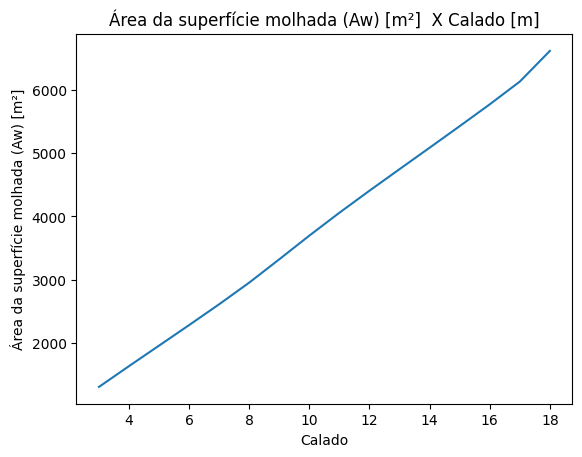

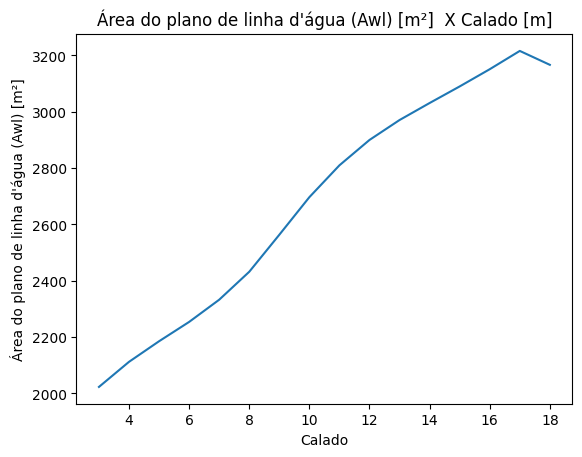

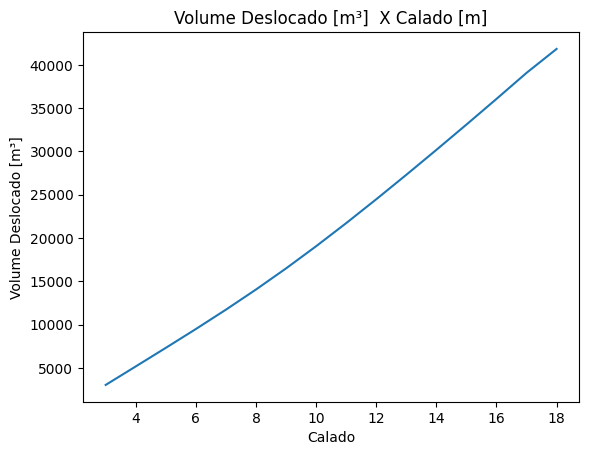

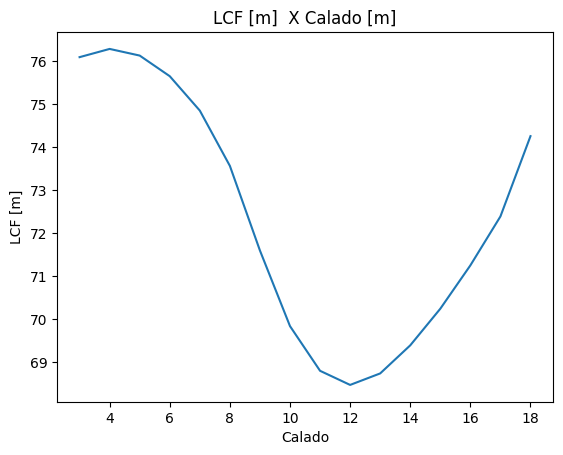

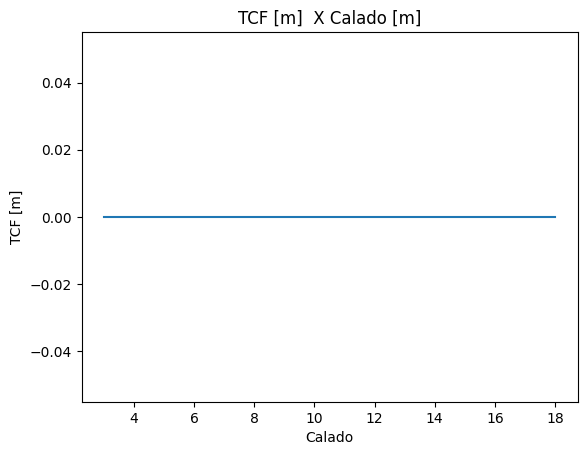

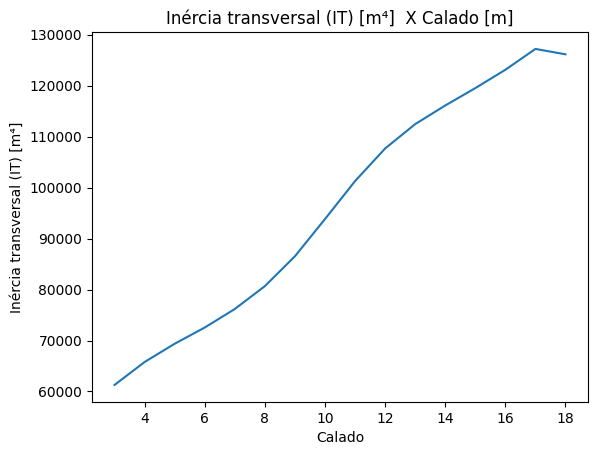

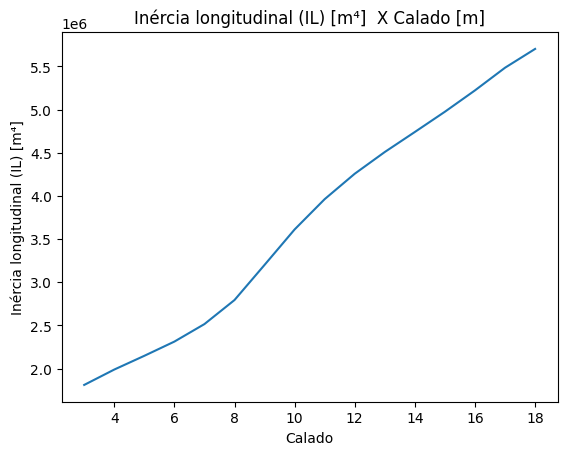

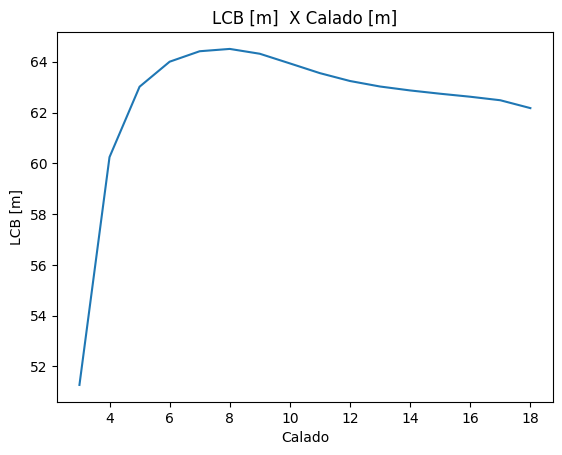

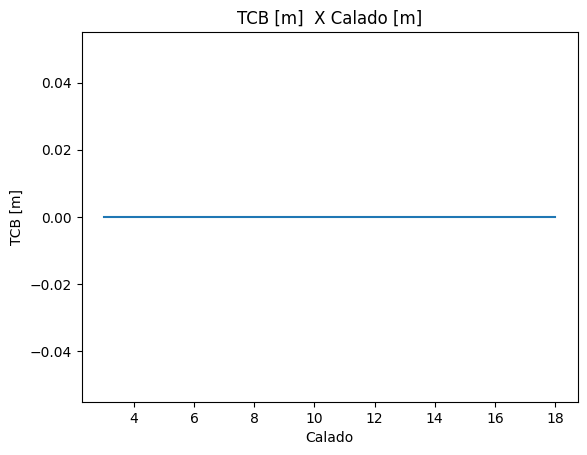

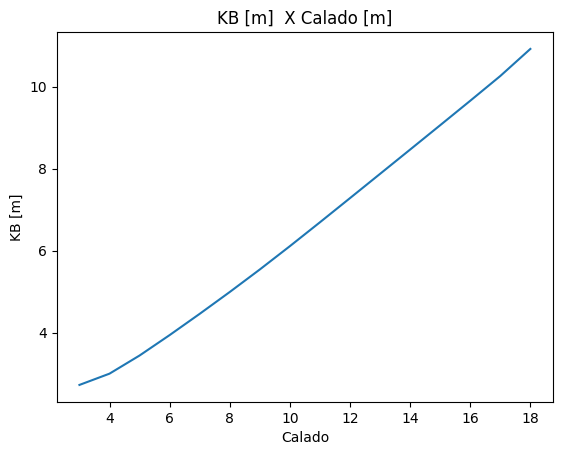

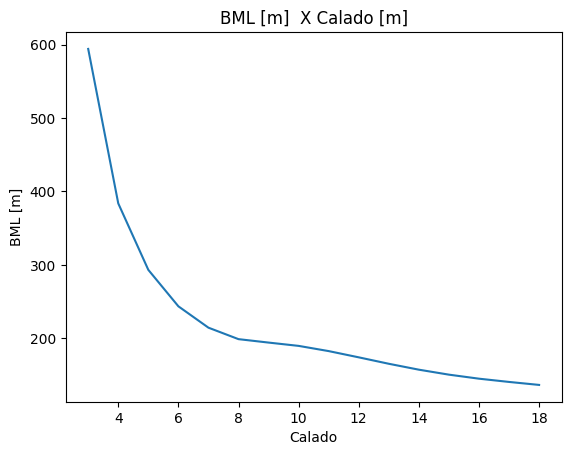

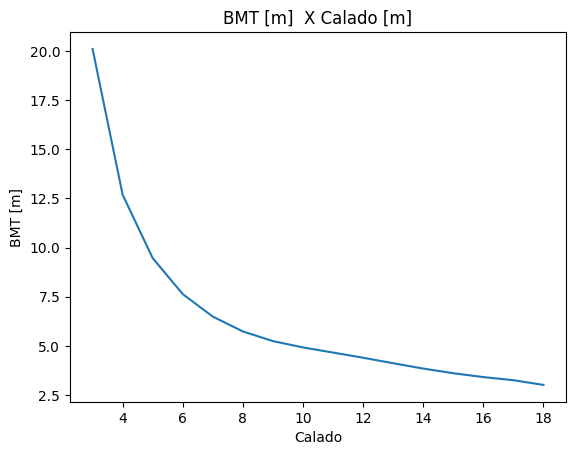

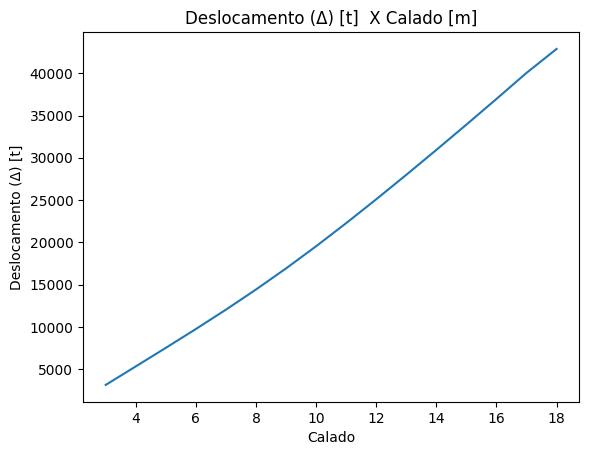


Calados: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

Área da superfície molhada (Aw) [m²]: [np.float64(1298.7809680322243), np.float64(1628.2620908700737), np.float64(1953.277995818093), np.float64(2278.3604459776757), np.float64(2608.556424285176), np.float64(2951.395678683756), np.float64(3320.579437817793), np.float64(3695.7188551220916), np.float64(4058.015763096035), np.float64(4407.08484216708), np.float64(4748.152901364407), np.float64(5087.693795355041), np.float64(5429.098902742461), np.float64(5774.775590812874), np.float64(6134.831010265437), np.float64(6620.824981381745)]

Área do plano de linha d'água (Awl) [m²]: [np.float64(2022.8318038739417), np.float64(2111.9269674249335), np.float64(2185.0457432682583), np.float64(2253.668083898934), np.float64(2332.490252435205), np.float64(2431.7687355114704), np.float64(2563.1954140690777), np.float64(2696.709529645281), np.float64(2809.7844035478483), np.float64(2899.848322454959), np.float64(2970.6173958227764), n

In [15]:
################################ PRINTS E RESULTADOS ################################

cotas = nInterpolaAmbos(cotas, 4)

resultadoPorCalado = []
inputs = np.arange(3, 19, 1) #(calado incial, valor de parada, passo)
for i in range(len(inputs)):
    caladoResultado = caladoEscolhido(cotas, inputs[i])
    caladoIndex, caladoTab = caladoResultado[0], caladoResultado[1]
    resultadoPorCalado.append(hidroProp(cotas, caladoIndex, caladoTab))

data = []
inputs = inputs.tolist()
parametros = ["Área da superfície molhada (Aw) [m\u00b2]", "Área do plano de linha d'água (Awl) [m\u00b2]", "Volume Deslocado [m\u00b3]", "LCF [m]", "TCF [m]",
              "Inércia transversal (IT) [m\u2074]", "Inércia longitudinal (IL) [m\u2074]", "LCB [m]", "TCB [m]", "KB [m]", "BML [m]", "BMT [m]", "Deslocamento (Δ) [t]"]

#propriedades em listas
for j in range(len(resultadoPorCalado[0])):
    currentData=[]
    for i in range(len(resultadoPorCalado)):
        currentData.append(resultadoPorCalado[i][j])
    
    data.append(currentData)

for i in range(len(parametros)):
    plt.plot(inputs, data[i])
    plt.xlabel("Calado")
    plt.ylabel(str(parametros[i]))
    plt.title(str(parametros[i]) + "  X Calado [m]")
    plt.show()

# Listas para cada propriedade hidrostática com o valor em relação a cada calado
print("\nCalados:", inputs)
for i in range(len(data)):
    print("\n"+str(parametros[i])+":", data[i])

